In [2]:
import os
os.chdir("/home/gridsan/qwang/urban-control/")

%load_ext autoreload
%autoreload 2

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# df = pd.read_csv("data/train/20250413_train.csv")
df0414 = pd.read_csv("data/train/20250414_train.csv")
# df0413 = pd.read_csv("data/train/20250413.csv")


In [83]:
sample = df0414.sample(10)

In [78]:
sample

,city_name,x,y,x_offset,y_offset,image_column,conditioning_image_column,caption,random
78890,dallas,15138,26497,5,0,data/satellite_tiles/dallas/16+5+0/15138/26497...,data/satellite_tiles_control_base/dallas/16+5+...,Satellite image of a town in Dallas. Landuse p...,0.609317
3185,chicago,16706,24418,0,0,data/satellite_tiles/chicago/16+0+0/16706/2441...,data/satellite_tiles_control_base/chicago/16+0...,Satellite image of a town in Chicago. Landuse ...,0.290243
5364,chicago,16726,24389,0,0,data/satellite_tiles/chicago/16+0+0/16726/2438...,data/satellite_tiles_control_base/chicago/16+0...,Satellite image of a town in Chicago. Landuse ...,0.345757
38894,chicago,16746,24391,5,5,data/satellite_tiles/chicago/16+5+5/16746/2439...,data/satellite_tiles_control_base/chicago/16+5...,Satellite image of a town in Chicago. Landuse ...,0.501897
7253,chicago,16740,24316,0,0,data/satellite_tiles/chicago/16+0+0/16740/2431...,data/satellite_tiles_control_base/chicago/16+0...,Satellite image of a town in Chicago. Landuse ...,0.230141
409,chicago,16670,24380,0,0,data/satellite_tiles/chicago/16+0+0/16670/2438...,data/satellite_tiles_control_base/chicago/16+0...,Satellite image of a town in Chicago. Landuse ...,0.719122
34907,chicago,16715,24372,5,5,data/satellite_tiles/chicago/16+5+5/16715/2437...,data/satellite_tiles_control_base/chicago/16+5...,Satellite image of a town in Chicago. Landuse ...,0.456153
61206,dallas,15211,26418,0,5,data/satellite_tiles/dallas/16+0+5/15211/26418...,data/satellite_tiles_control_base/dallas/16+0+...,Satellite image of a town in Dallas. Landuse p...,0.509058
40473,chicago,16757,24419,5,5,data/satellite_tiles/chicago/16+5+5/16757/2441...,data/satellite_tiles_control_base/chicago/16+5...,Satellite image of a town in Chicago. Landuse ...,0.496604
8271,chicago,16748,24235,0,0,data/satellite_tiles/chicago/16+0+0/16748/2423...,data/satellite_tiles_control_base/chicago/16+0...,Satellite image of a town in Chicago. Landuse ...,0.469037


In [ ]:
print(df.iloc[0]['conditioning_image_column'])
print(df.iloc[0]['caption'])

data/satellite_tiles_control_residential/la/16+5+0/11287/26187.png
This is a satellite image of la where the city forms the core. Additionally, the landscape is primarily forest (40%) , with pockets of residential (35%), recreational (5%) . This area has a medium building density. Additionally, the residential buildings are mainly single-family homes. Meanwhile, the residential area is concentrated in the center of the image in shaded orange.


In [7]:
print(df.iloc[-3]['conditioning_image_column'])
print(df.iloc[-3]['caption'])

data/satellite_tiles_control_base/dallas/16+0+5/15098/26491.png
City: dallas, settlement: city.landuse: forest (70%) , residential (30%) . Building density medium.residential type: mainly single-family homes.


In [65]:
sample

,city_name,x,y,x_offset,y_offset,image_column,conditioning_image_column,caption,random
21786,dallas,15140,26445,5,5,data/satellite_tiles/dallas/16+5+5/15140/26445...,data/satellite_tiles_control_base/dallas/16+5+...,Satellite image of a city in Dallas. Landuse p...,0.939745
52686,dallas,15140,26445,0,0,data/satellite_tiles/dallas/16+0+0/15140/26445...,data/satellite_tiles_control_base/dallas/16+0+...,Satellite image of a city in Dallas. Landuse p...,0.536718
79020,dallas,15140,26445,5,0,data/satellite_tiles/dallas/16+5+0/15140/26445...,data/satellite_tiles_control_base/dallas/16+5+...,Satellite image of a city in Dallas. Landuse p...,0.959263


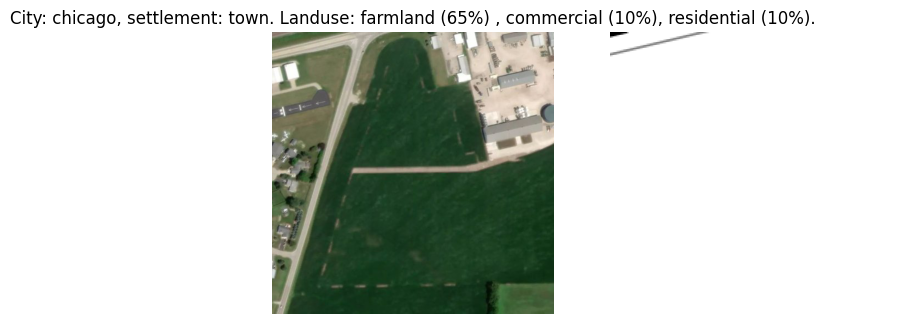

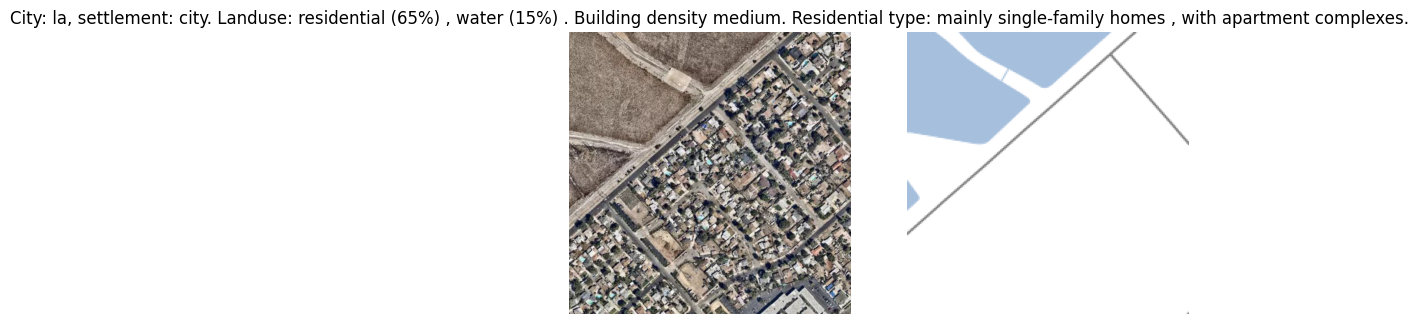

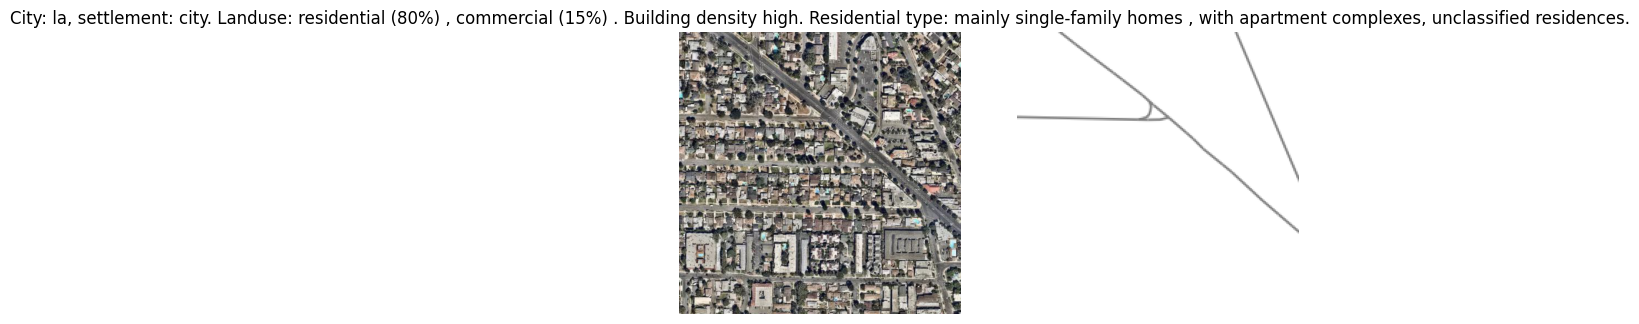

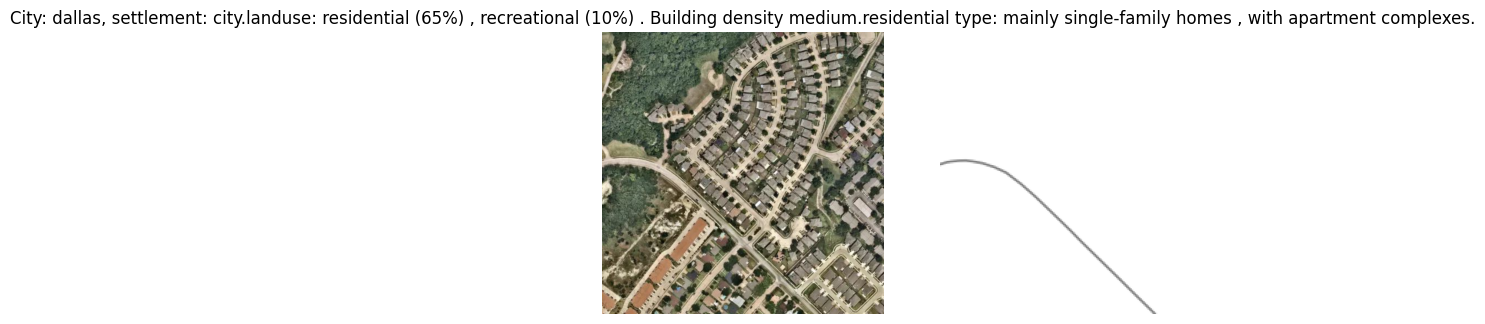

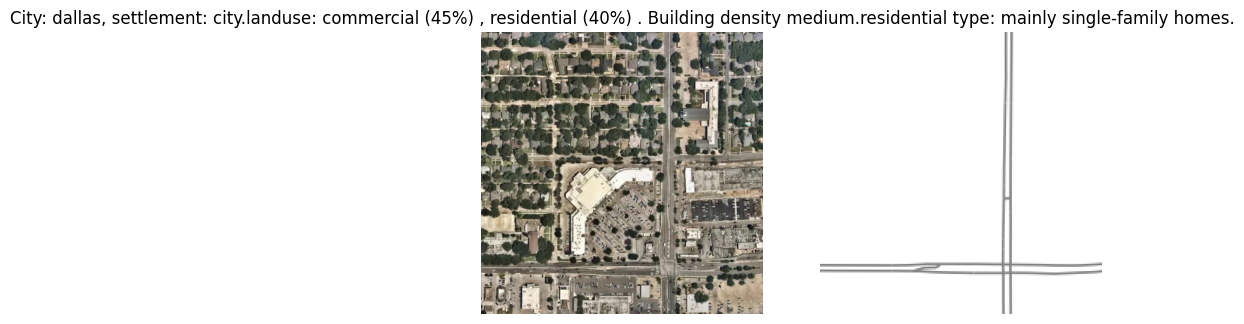

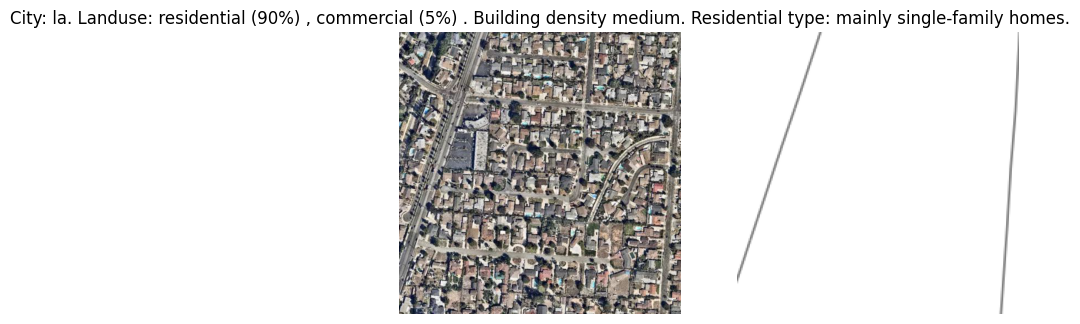

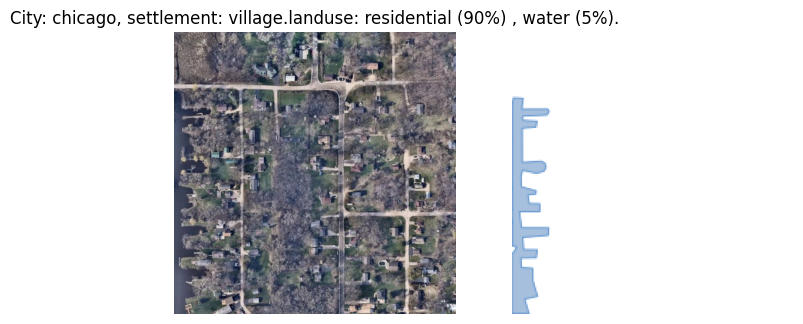

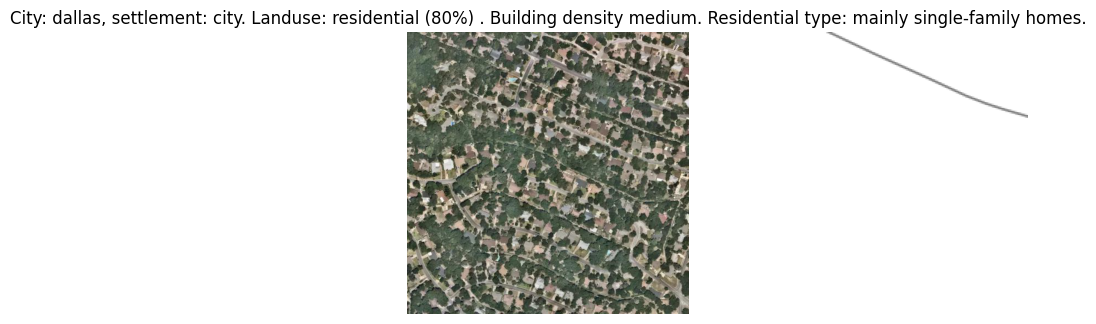

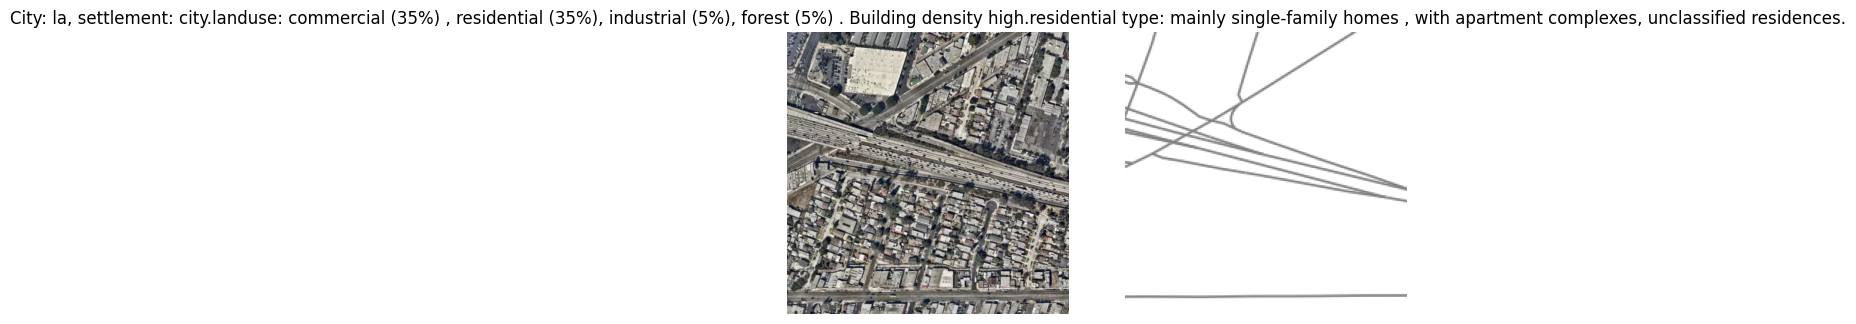

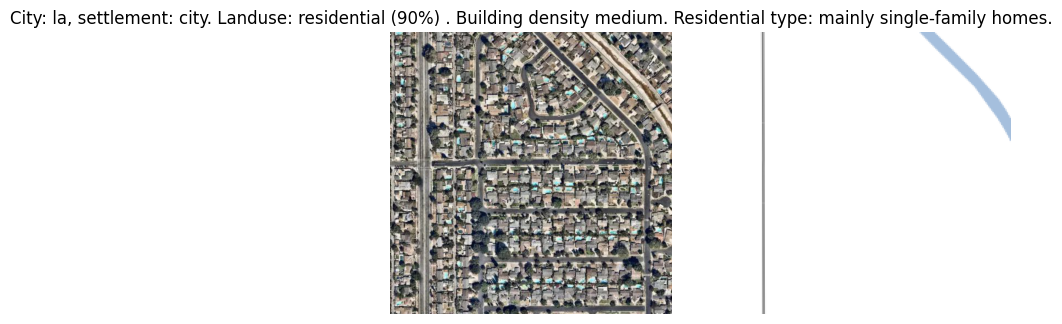

In [73]:
# df = df0414
# sample = df[(df['city_name']=='dallas')&(df['x']==15140)&(df['y']==26445)]

for i in range(len(sample)):
    
    target_image = Image.open(sample.iloc[i]['image_column']).convert("RGB")
    control_image = Image.open(sample.iloc[i]['conditioning_image_column']).convert("RGB")
    # target_image = Image.open(sample_image[i]).convert("RGB")
    # control_image = Image.open(sample_image[i].replace("satellite_tiles","satellite_tiles_control_base")).convert("RGB")

    fig, ax = plt.subplots(1,2, figsize=(8, 4))

    ax[0].imshow(target_image)
    ax[1].imshow(control_image)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title(sample.iloc[i]['caption'])

In [85]:
# df = df0413
# sample = df[(df['city_name']=='dallas')&(df['x']==15140)&(df['y']==26445)]

for i in range(len(sample)):
    print(sample.iloc[i][['x_offset','y_offset']],sample.iloc[i]['caption'])    
#     target_image = Image.open(sample.iloc[i]['image_column']).convert("RGB")
#     control_image = Image.open(sample.iloc[i]['conditioning_image_column']).convert("RGB")
#     # target_image = Image.open(sample_image[i]).convert("RGB")
#     # control_image = Image.open(sample_image[i].replace("satellite_tiles","satellite_tiles_control_base")).convert("RGB")

#     fig, ax = plt.subplots(1,2, figsize=(8, 4))

#     ax[0].imshow(target_image)
#     ax[1].imshow(control_image)
#     ax[0].axis('off')
#     ax[1].axis('off')
#     ax[0].set_title(sample.iloc[i]['caption'])

x_offset    0
y_offset    5
Name: 57210, dtype: object Satellite image of a town in Dallas. Landuse parcels include 100 percent industrial, 25 percent nature reserve. Dense building coverage. 
x_offset    0
y_offset    5
Name: 70622, dtype: object Satellite image of a city in Los Angeles. Landuse parcels include 95 percent residential. Residential area has a mix of apartments and houses. Dense building coverage. 
x_offset    5
y_offset    5
Name: 87193, dtype: object Satellite image of a town in Los Angeles. Landuse parcels include 95 percent residential, 5 percent commercial, 10 percent park. Residential area consists entirely of houses. Dense building coverage. 
x_offset    5
y_offset    0
Name: 80936, dtype: object Satellite image of a town in Dallas. Landuse parcels include 85 percent residential, 20 percent park, 10 percent nature reserve. Residential area consists entirely of houses. Medium building coverage. 
x_offset    5
y_offset    0
Name: 75728, dtype: object Satellite image

In [67]:
sample

,city_name,x,y,x_offset,y_offset,image_column,conditioning_image_column,caption
